### **IS 545 Object Oriented Programming and Data Structures**

# Assignment 3

Upload your solutions (as a **ipynb** file) to the [odtuclass](https://odtuclass.metu.edu.tr/) web site for the course.
Late submissions will incur a -1% penalty per hour after the deadline.

You are expected to work **individually**,  <u>NOT in groups</u>. You will also be expected to follow **the academic integrity rules**. 

**Important Note**

You are not allowed to copy code snippets existing in the internet (using search engines etc.), these attempts will get **zero points** from the related answers.
## Requirements
- Do not import any external library unless otherwise specified!
- Please comment out or delete "raise NotImplementedError()" statements before you implement the related code block.

## Description
In this assignment, you will evaluate arithmetic expressions given as String. A utility function is provided for you to convert a string a sequence of tokens. Therefore you will work with parsed tokens only, not the input string.

You will also comment on the analysis of the built-in list class implementation in Python.

## Student Info (fill the fields below)

Name: Abdullah Alzariqi

ID: 2645166

## parse_expression utility function (do not modify)
In this assignment, you will use the following function called **parse_expression** that parses an arithmetic expression. The only input of the function is be a String containing the expression, and output will be a tuple containing operators  
~~~~Python
['+','-','*','/','(',')']
~~~~
and numbers as **positive floating point** numbers. 

**Spaces** are ignored and **scientific notation** is also accepted.

For wrong inputs, **ValueError** is raised!

In [1]:
import re
def parse_expression(s):
    pattern = re.compile(r"\s*([\(\)\+\-\*/]|(\d+(\.\d*)?|\d*\.\d+)([eE][+-]?\d+)?)\s*")
    n = len(s)
    i = 0
    L = []
    while i < n:
        m = pattern.match(s, i)
        if m is None:
            raise ValueError()
        i = m.end()
        token = m.group(1)
        if token in "+-/*()":
            L.append(token)
        else:
            L.append(float(token))
    return tuple(L)

assert (6.0, '*', '(', 2.0, '+', 3.0, ')', '/', '(', 23.5, '+', '(', 200.0, '+', 100.0, '-', 100.0, ')', ')') == \
      parse_expression(" 6*(2.0+3.) / (23.5+(.2E3  + 0.1e+3-10000E-2 ))  ")

For example:
~~~~Python
" 6*(2.0+3.) / (23.5+(.2E3  + 0.1e+3-10000E-2 ))  "
~~~~ 
returns the following tuple
~~~~Python
(6.0, '*', '(', 2.0, '+', 3.0, ')', '/', '(', 23.5, '+', '(', 200.0, '+', 100.0, '-', 100.0, ')', ')')
~~~~
Note that all numbers are float and all the operators are characters (i.e. strings with length one)

In [2]:
# you can try your own expressions here
parse_expression(" 23*(4.0-5.) / 23.5+.5E2  ")[0]

23.0

## Q01 (ctypes module allowed) (30 pts)
Create an efficient array based stack called **FloatArrayStack** with the following features:
- Implements Stack ADT given in the lectures (push, pop, top, is_empty, len)
- Uses **ctypes** module's **c_double** type to construct underlying array
- Stores floating point numbers only (when int value is pushed, it is stored as float)
- Has a **capacity** given as a parameter on creation.
- If number of items contained exceeds capacity, push method should raise an Exception indicating that the *Stack is Full*, so the underlying array will not be resized

In [10]:
from ctypes import c_double

class FloatArrayStack:
    """LIFO Stack implementation using a ctypes c_double as underlying storage."""
  
    def __init__(self, capacity):
        """Create an empty stack."""
        self._data = (c_double * capacity)() # nonpublic ctypes array instance
        self._count = 0
        self._capacity = capacity

    def __len__(self):
        """Return the number of elements in the stack."""
        return self._count

    def is_empty(self):
        """Return True if the stack is empty."""
        return self._count == 0

    def push(self, e):
        """Add element e at the top of the stack.
        Raise exception if the stack is full.
        """
        # ============ YOUR CODE HERE ============
        if self._count <= self._capacity:
            self._data[self._count] = e
            self._count += 1
            return
        raise Exception ("Stack is Full")
        # ========================================

    def top(self):
        """Return (but do not remove) the element at the top of the stack.
        Raise exception if the stack is empty.
        """
        # ============ YOUR CODE HERE ============
        if self._count != 0:
            return self._data[self._count-1]
        raise Exception ("Stack is Empty")
        # ========================================

    def pop(self):
        """Remove and return the element from the top of the stack (i.e., LIFO).

        Raise exception if the stack is empty.
        """
        # ============ YOUR CODE HERE ============
        if self._count != 0:
            self._data[self._count -1], ret =0 ,  self._data[self._count -1]
            self._count -= 1
            return ret
        raise Exception ("Stack is Empty")
        # ========================================

#You can use the following code to test your class
fs = FloatArrayStack(10)
fs.push(1.0)
fs.push(3)
fs.push(.4)
assert 3 == len(fs)
assert 0.4 == fs.pop()
assert 3.0 == fs.top()
assert 3.0 == fs.pop()
assert 1.0 == fs.pop()
assert 0 == len(fs)


## Q02 (30 pts)
Use the following code of ListStack modified from the code supplied in the textbook. This stack has an additional method called **memsize** that returns the memory allocated for the underlying list object. You will use this information to analyze list class.

In [4]:
import sys

class ListStack:

    def __init__(self):
        self._data = []                                            

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data) == 0

    def push(self, e):
        self._data.append(e)                                    

    def top(self):
        if self.is_empty():
            raise Exception('Stack is empty')
        return self._data[-1]                                 

    def pop(self):
        if self.is_empty():
            raise Exception('Stack is empty')
        return self._data.pop()     
    
    def memsize(self):
        return sys.getsizeof(self._data)

# create a list stack
ls = ListStack()
indices = []
deltas = []
lastsize = ls.memsize()
# add thousand values one by one and print when used internal mem changed
for i in range(1000):
    ls.push(0)
    size = ls.memsize()
    delta = size - lastsize
    lastsize = size
    if delta != 0:
        print('(', i, ':', delta, ')', end=",") #print index and delta when memsize is changed
        indices.append(i)
        deltas.append(delta)
print()

( 0 : 32 ),( 4 : 32 ),( 8 : 64 ),( 16 : 72 ),( 25 : 80 ),( 35 : 88 ),( 46 : 96 ),( 58 : 112 ),( 72 : 128 ),( 88 : 144 ),( 106 : 160 ),( 126 : 176 ),( 148 : 200 ),( 173 : 224 ),( 201 : 256 ),( 233 : 288 ),( 269 : 320 ),( 309 : 360 ),( 354 : 408 ),( 405 : 456 ),( 462 : 512 ),( 526 : 576 ),( 598 : 648 ),( 679 : 736 ),( 771 : 824 ),( 874 : 928 ),( 990 : 1040 ),


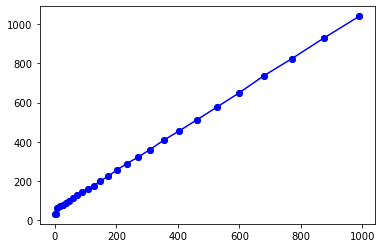

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(indices, deltas)
plt.plot(indices, deltas, '-ob')

The graph above shows the points when the internally used memory size is changed.
Examine the code and the graph above, and answer the following questions about the **list** class:

a) What is the space complexity of this class?

============ YOUR ANSWER HERE ============
Space Complexity of this class is O(n). It can be observed from the linear relationship between the number of added values(Indices) and the growth of used memory shown in the graph above
==========================================


b) What kind of data structure implementation is being used by the list class?

============ YOUR ANSWER HERE ============
By investigating the functionality of this class we can deduce that this is a stack data structure employing Push, Top, and pop methods.
==========================================


c) Comment on the resizing frequency of the allocated memory, and also on the memory growing strategy used by this class?

============ YOUR ANSWER HERE ============
The figure shows that the resizing happens more frequently at the beginning. The Resizing frequency starts to decrease slowly as the number of indices(values appended to the listStack)increase. Following the pattern of the resizing occuring in the abovementioned figure, it can be said that it is follwoing an incremental strategy.
==========================================


## Q03 (40 pts)
Write a function that evaluates an arithmetic expression with the following requirements:
- **Input** is the tuple of parsed tokens provided as the output of `parse_expression` function, i.e. a list of characters (for operators) and float values.
- **Output** is the result of the evaluation of the expression, i.e. a floating point number
- Function should raise exception when an invalid expression is given
- Use double stack implementation based expression evaluation algorithm that was provided in the lecture slides.
    - Use **FloatArrayStack** (with capacity of 20) for numbers (operands)
    - Use **ListStack** for operators
- You will **improve** the algorithm given in the textbook so that it supports **parentheses** as well
- Allowed operators are defined in function `parse_expression`, their precedences shall be computed using **pred** function provided below, i.e. precedences are:
    - 1 for '(' and ')'
    - 2 for '+' and '-'
    - 3 for '*' and '/'
- Here is how you improve the algorithm when parentheses are provided in the input:
    - If the operator is '(', push it to the operator stack
    - If the operator is ')', perform **doOp()** opreation until '(' is popped from the stack
    - Note that '(' has lower precedence than all other arithmetic operators and ')' is never pushed to the stack
- You may define multiple functions or global variables
- There is a built-in python function called **eval()**, which evaluates an expression, it is forbidden to use that function in your solution, however you can use it to test your code.
- You will get partial points anyway even if you don't implement parentheses, it is recommended that you first implement the algorithm given in the slides, then improve it by adding parenthesis support.

In [9]:
OPERATORS = "$()+-*/"
#Operation Precedence
OpPre = {'*':1 , '/':1,')':1,'(':-1, '+':0,'-':0, '$':-2}

def prec(op):
    return 1 + OPERATORS.index(op) // 2

def eval_tokens(tokens):
    floats = FloatArrayStack(20)
    ops = ListStack()
    # ============ YOUR CODE HERE ============


    #Evlautaing Expressions 
    def doOp():
        x=floats.pop()
        y=floats.pop()
        Op = ops.pop()

        if Op == '+':
            stv = x+y
            floats.push(stv)
            return stv

        if Op == '-':
            stv = y-x
            floats.push(stv)
            return stv

        if Op == '*':
            stv = x*y
            floats.push(stv)
            return stv

        if Op == '/':
            stv = y/x
            floats.push(stv)
            return stv

        
    def repeatOps(refOp) : 
        while (floats._count > 1 and prec(refOp) <= prec(ops.top()) ):
            doOp()
    for x in tokens:
        if isinstance(x, float):
            floats.push(x)
        elif x == '(':
           ops.push(x)
        elif x ==')':
            while ops.top() != '(':
                doOp()
            ops.pop()
        else:
            repeatOps(x)
            ops.push(x)

    repeatOps("$")

    return floats.top()


    # ========================================

def eval_expression(expression):
    tokens = parse_expression(expression)
    return eval_tokens(tokens)

print(eval_tokens(('(', 3.0, '+', 5.0, ')', '*', 2.0)))
#You can use the following code to test you code
assert 3.0 == eval_tokens((3.0,))
assert 8.0 == eval_tokens((3.0, '+', 5.0))
assert 13.0 == eval_tokens((3.0, '+', 5.0, '*', 2.0))
assert 16.0 == eval_tokens(('(', 3.0, '+', 5.0, ')', '*', 2.0))
#You can also use the given parse_expression function
assert 0.1342281879194631 == eval_expression(" 6*(2.0+3.) / (23.5+(.2E3  + 0.1e+3-10000E-2 ))  ")

16.0
